# File System
## Intro
- A file system is a fundamental component of any operating system, responsible for organzing, storing, and managing files and directories on storage devices. It provides a structureal way to manage data, ensuring efficient storage, retrieval, and manipulating of digital information.

## Rules and Core Concepts
### File system principles
1. Hierarchical Structure: Files and directories are organized in a tree-like hierarchy.
2. File Attributes: Each file has metadata like name, size, creation time, permissions.
3. Directory Management: Directories can contain files and other directories.
4. File Operations: Support for basic operations like create, read, update, delete (CRUD)
5. Path-Based Access: Resources are accessed using string paths like

## Interview Settings
### Point 1: Intro and Vague Problem statement
- Interviewer: Design a basic File System management system
- Candidate: Let me outline the core requirements and key characteristics
    - Support hierarchical path structure using the "/" delimeter
    - Implement path creation and value association.
    - Manage file metadata.
    - Handle different file types.
### Point 2: Clarifying Requirements
- Interviewer: Specify the core requirements for our file system
    - Support creating files and directories'
    - Implement path navigation
    - Manage file metadata
    - support for different file types
- Candidate: To esnure clarity, I'll summarize the key requirements
    - Hierarchical path structure with "/" as delimiter
    - CRUD operations (Create, Read, Update, Delete)
    - Path validation including parent path existence
    - Efficient storage and retrieval of files and directories.
    - Support for path-value associations.
### Point 3: Identify Key components
- Key components of our File System Design:
    1. File System Node (Trie Node):
        - Common properties and methods for both files and directories.
        - Represents the base entity in the file system
    2. File class
        - Represents individual files
        - Stores file-specific metadata and content
    3. Directory Class
        - Manages collection of files and subdirectories
        - Hanldes path creation, validation, and retrieval
    4. File system Manager
        - Central manager for file system operations
        - Handles path creation, validation, and retrieval.
### Point 4: Design Challeges 
- Interviewer: What design challenges do we anticipate?
- Candidate: key challenges include:
    - Efficient path resoution and navigation
    - Handling nested path structures
    - Ensuring parent paths exist before creating child paths
    - managing path-value associations
    - supporting path traversal and retrieval
### Point 5: Design Approacg
- To address these challenges, I propose leveraging, several design patterns"
    1. Composite Pattern for Hierarchical Structure:
        - Treat files and directories uniformly
        - Enable recursive operations on file system nodes
    2. Singleton Pattern for File System Manager:
        - Centralized management of file system
        - Ensure single point of control
### Point 6: Implementation
- Interviewer: Ready to discuss implementation?

## Design File system with Design Patterns
#### Path Representation
- In our file system implementation, Paths are represented using a trie data structure, which efficiently handles hierarchical data. This approach allows us to store and navigate the file system with optimal time complexity for operations like path creation, deletion, and retrieval.
- The trie representation maps each component of a path to a node in the tree, where:
    - The root node represents the root directory '/'
    - Each subsequent path component becomes a child node.
    - Directory nodes can have multiple children.
    - File nodes are always leaf nodes in the tree.
    - Each node contains metadata such as creation time and modification time.
#### Path-to-Trie Mapping Example:
- Let's examine how a specific path is represented as a trie structure in our system. For example, the path:
- /document/cwa_lld/solid_principles.java : Is broken down and represented in the trie as follows:
- 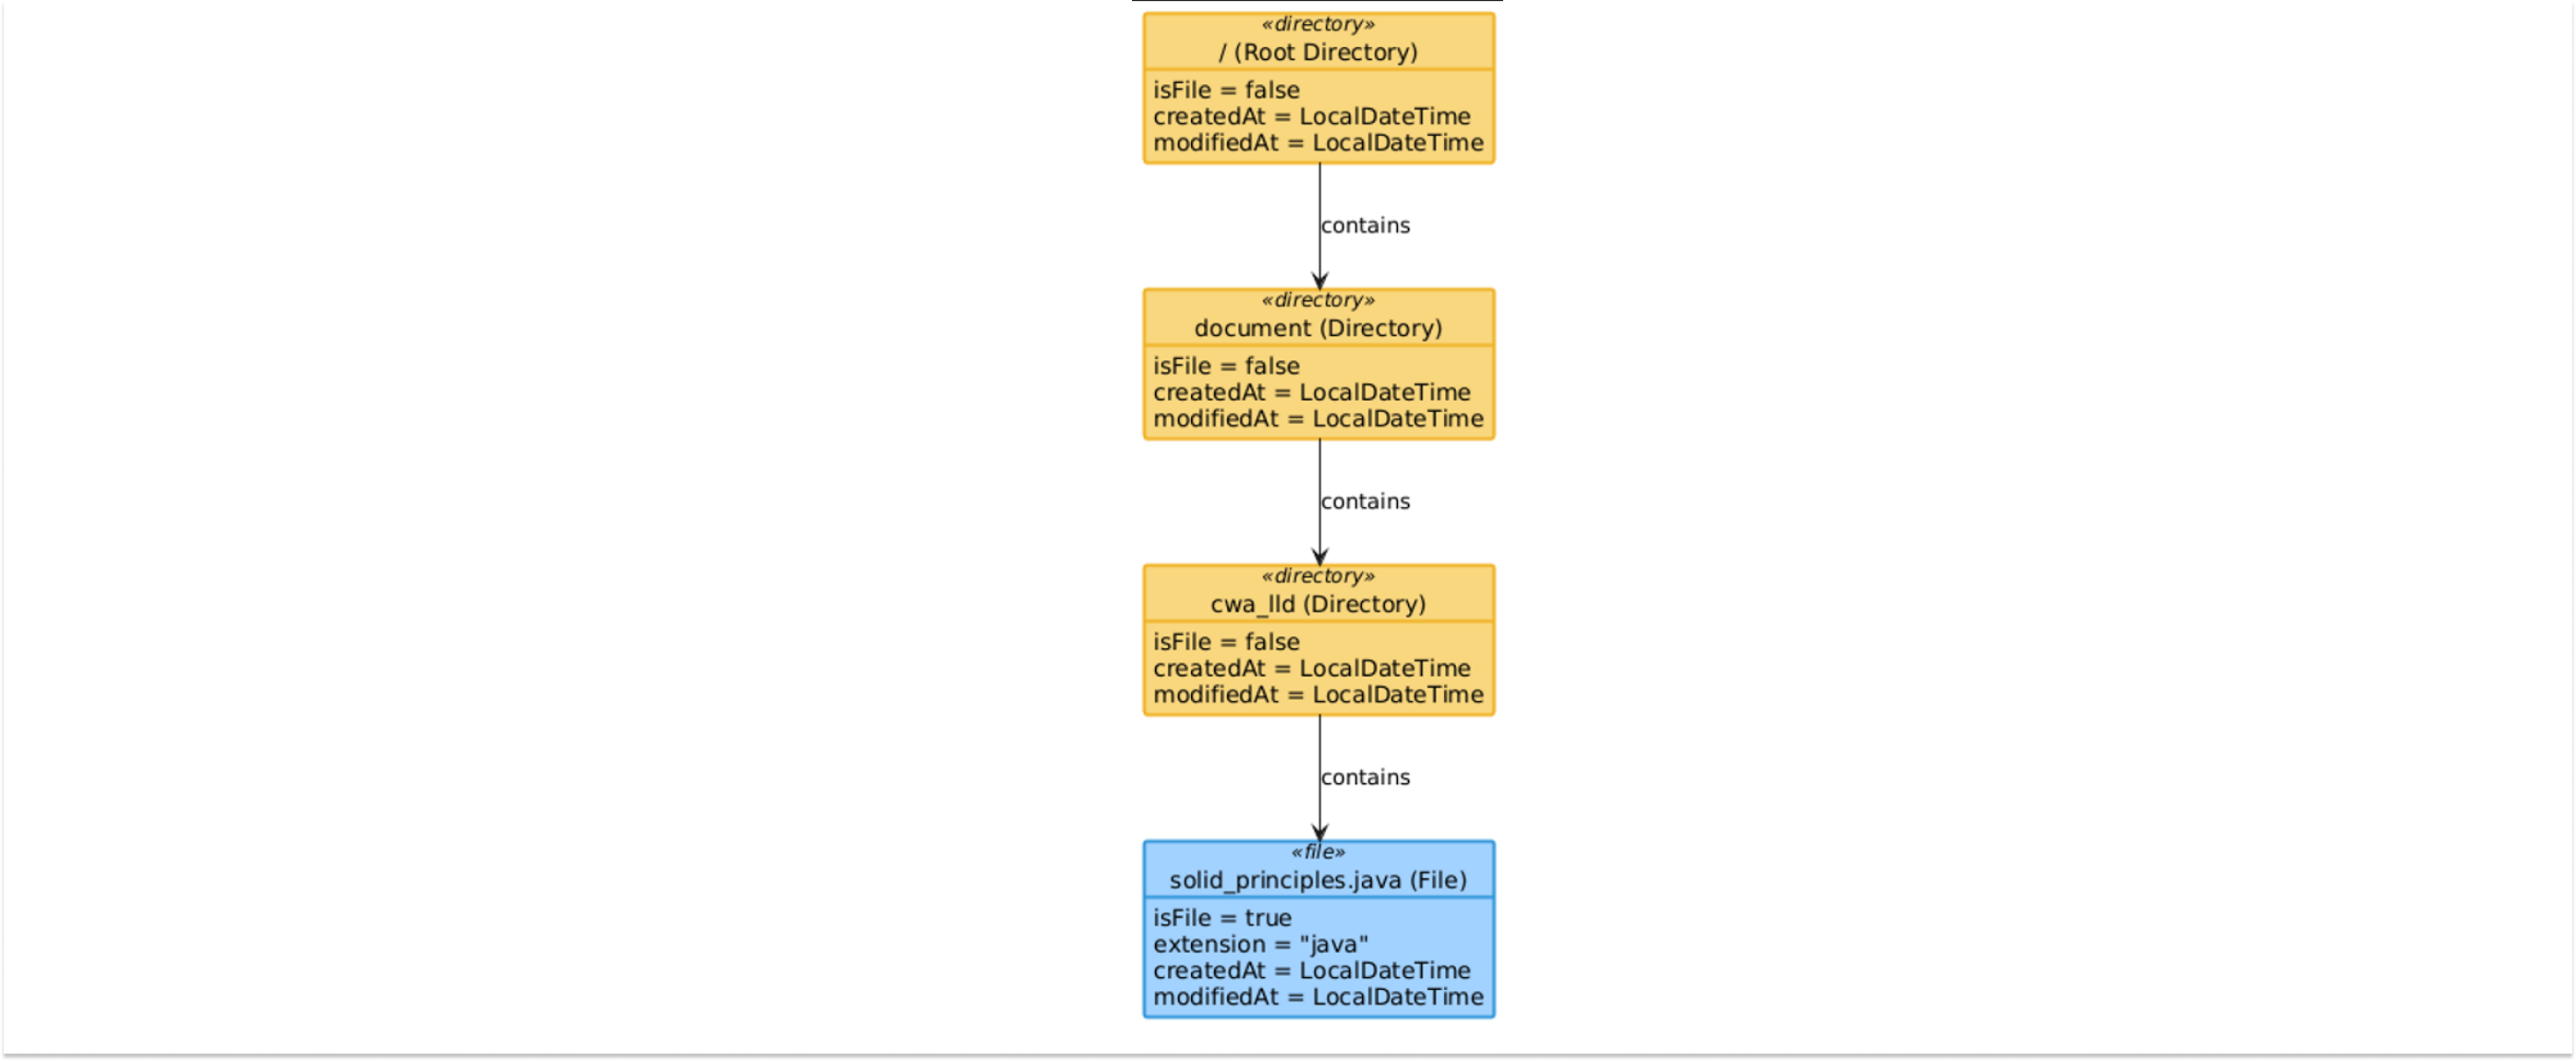
- /document/cwa_lld/design_file_system.java
- 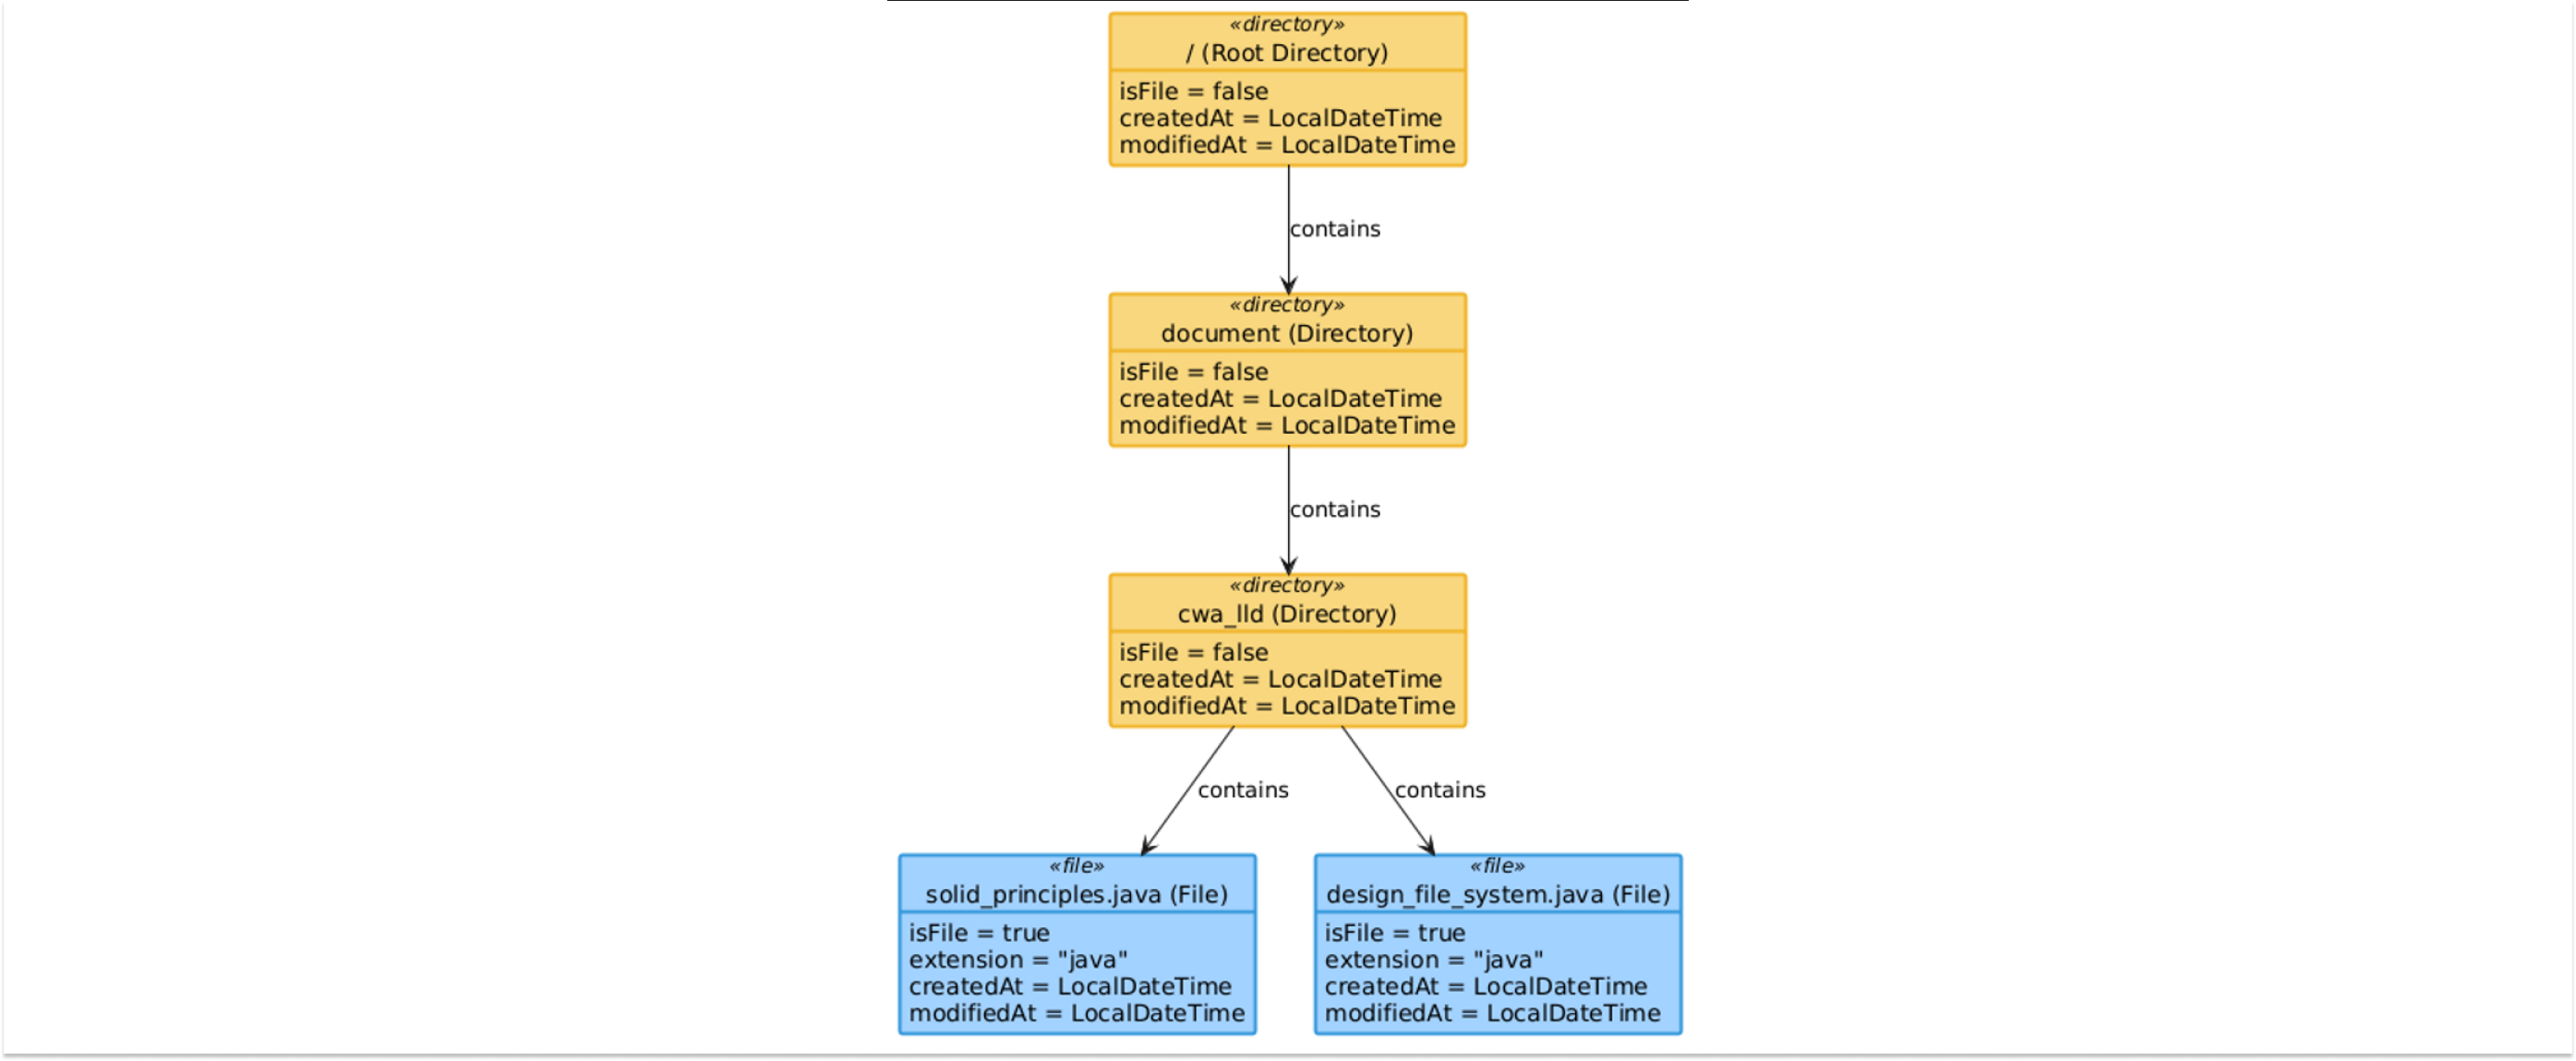
- /document/cwa_hld/horizontal_scaling.txt
- /document/cwa_hld/consistent_hashing.java
- 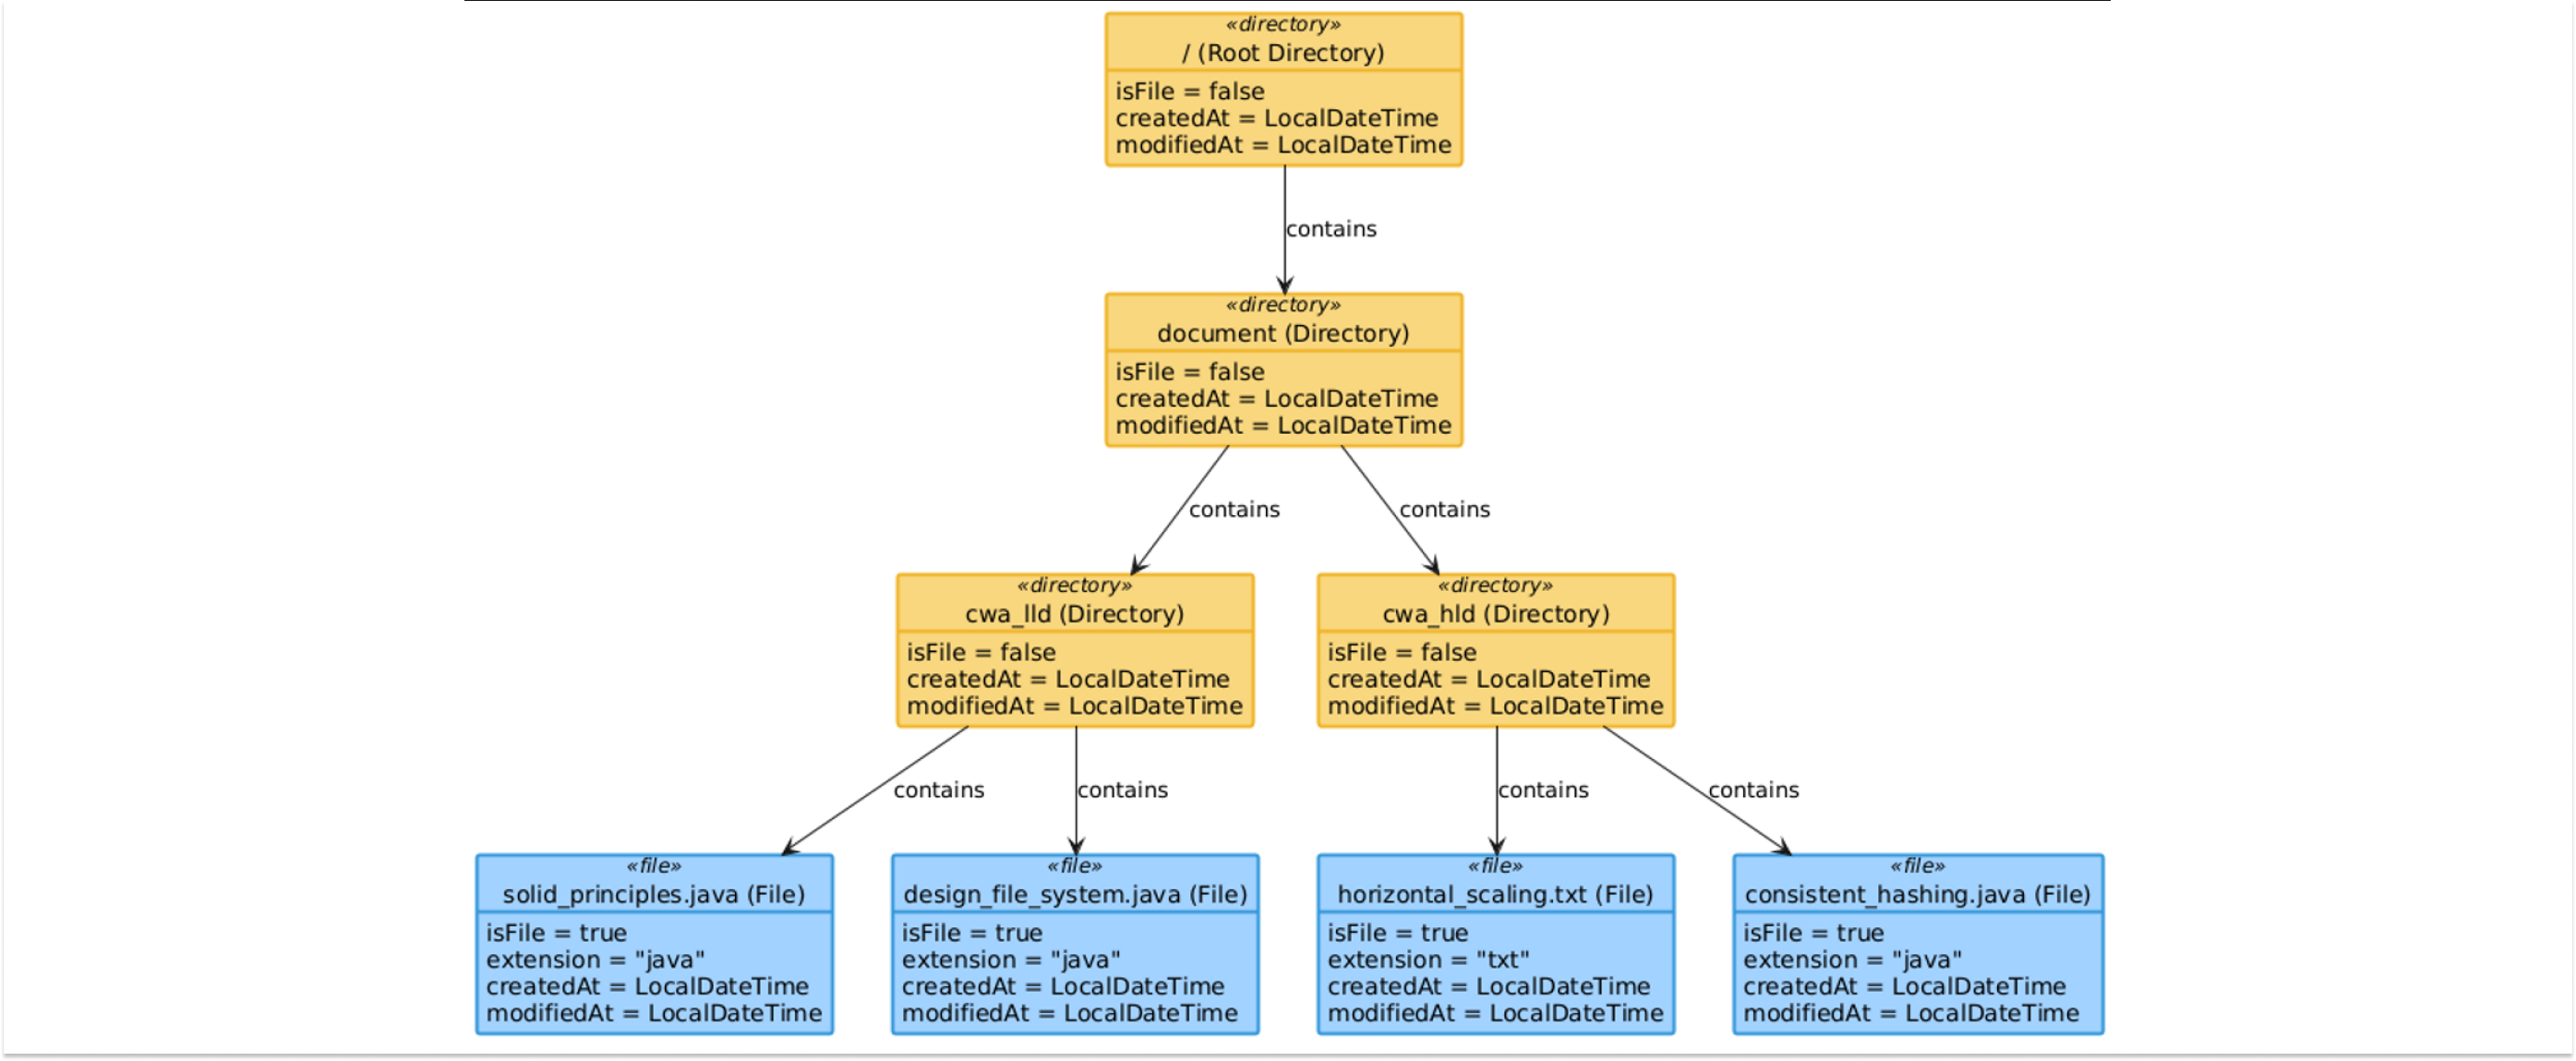

#### Design Pattern
- 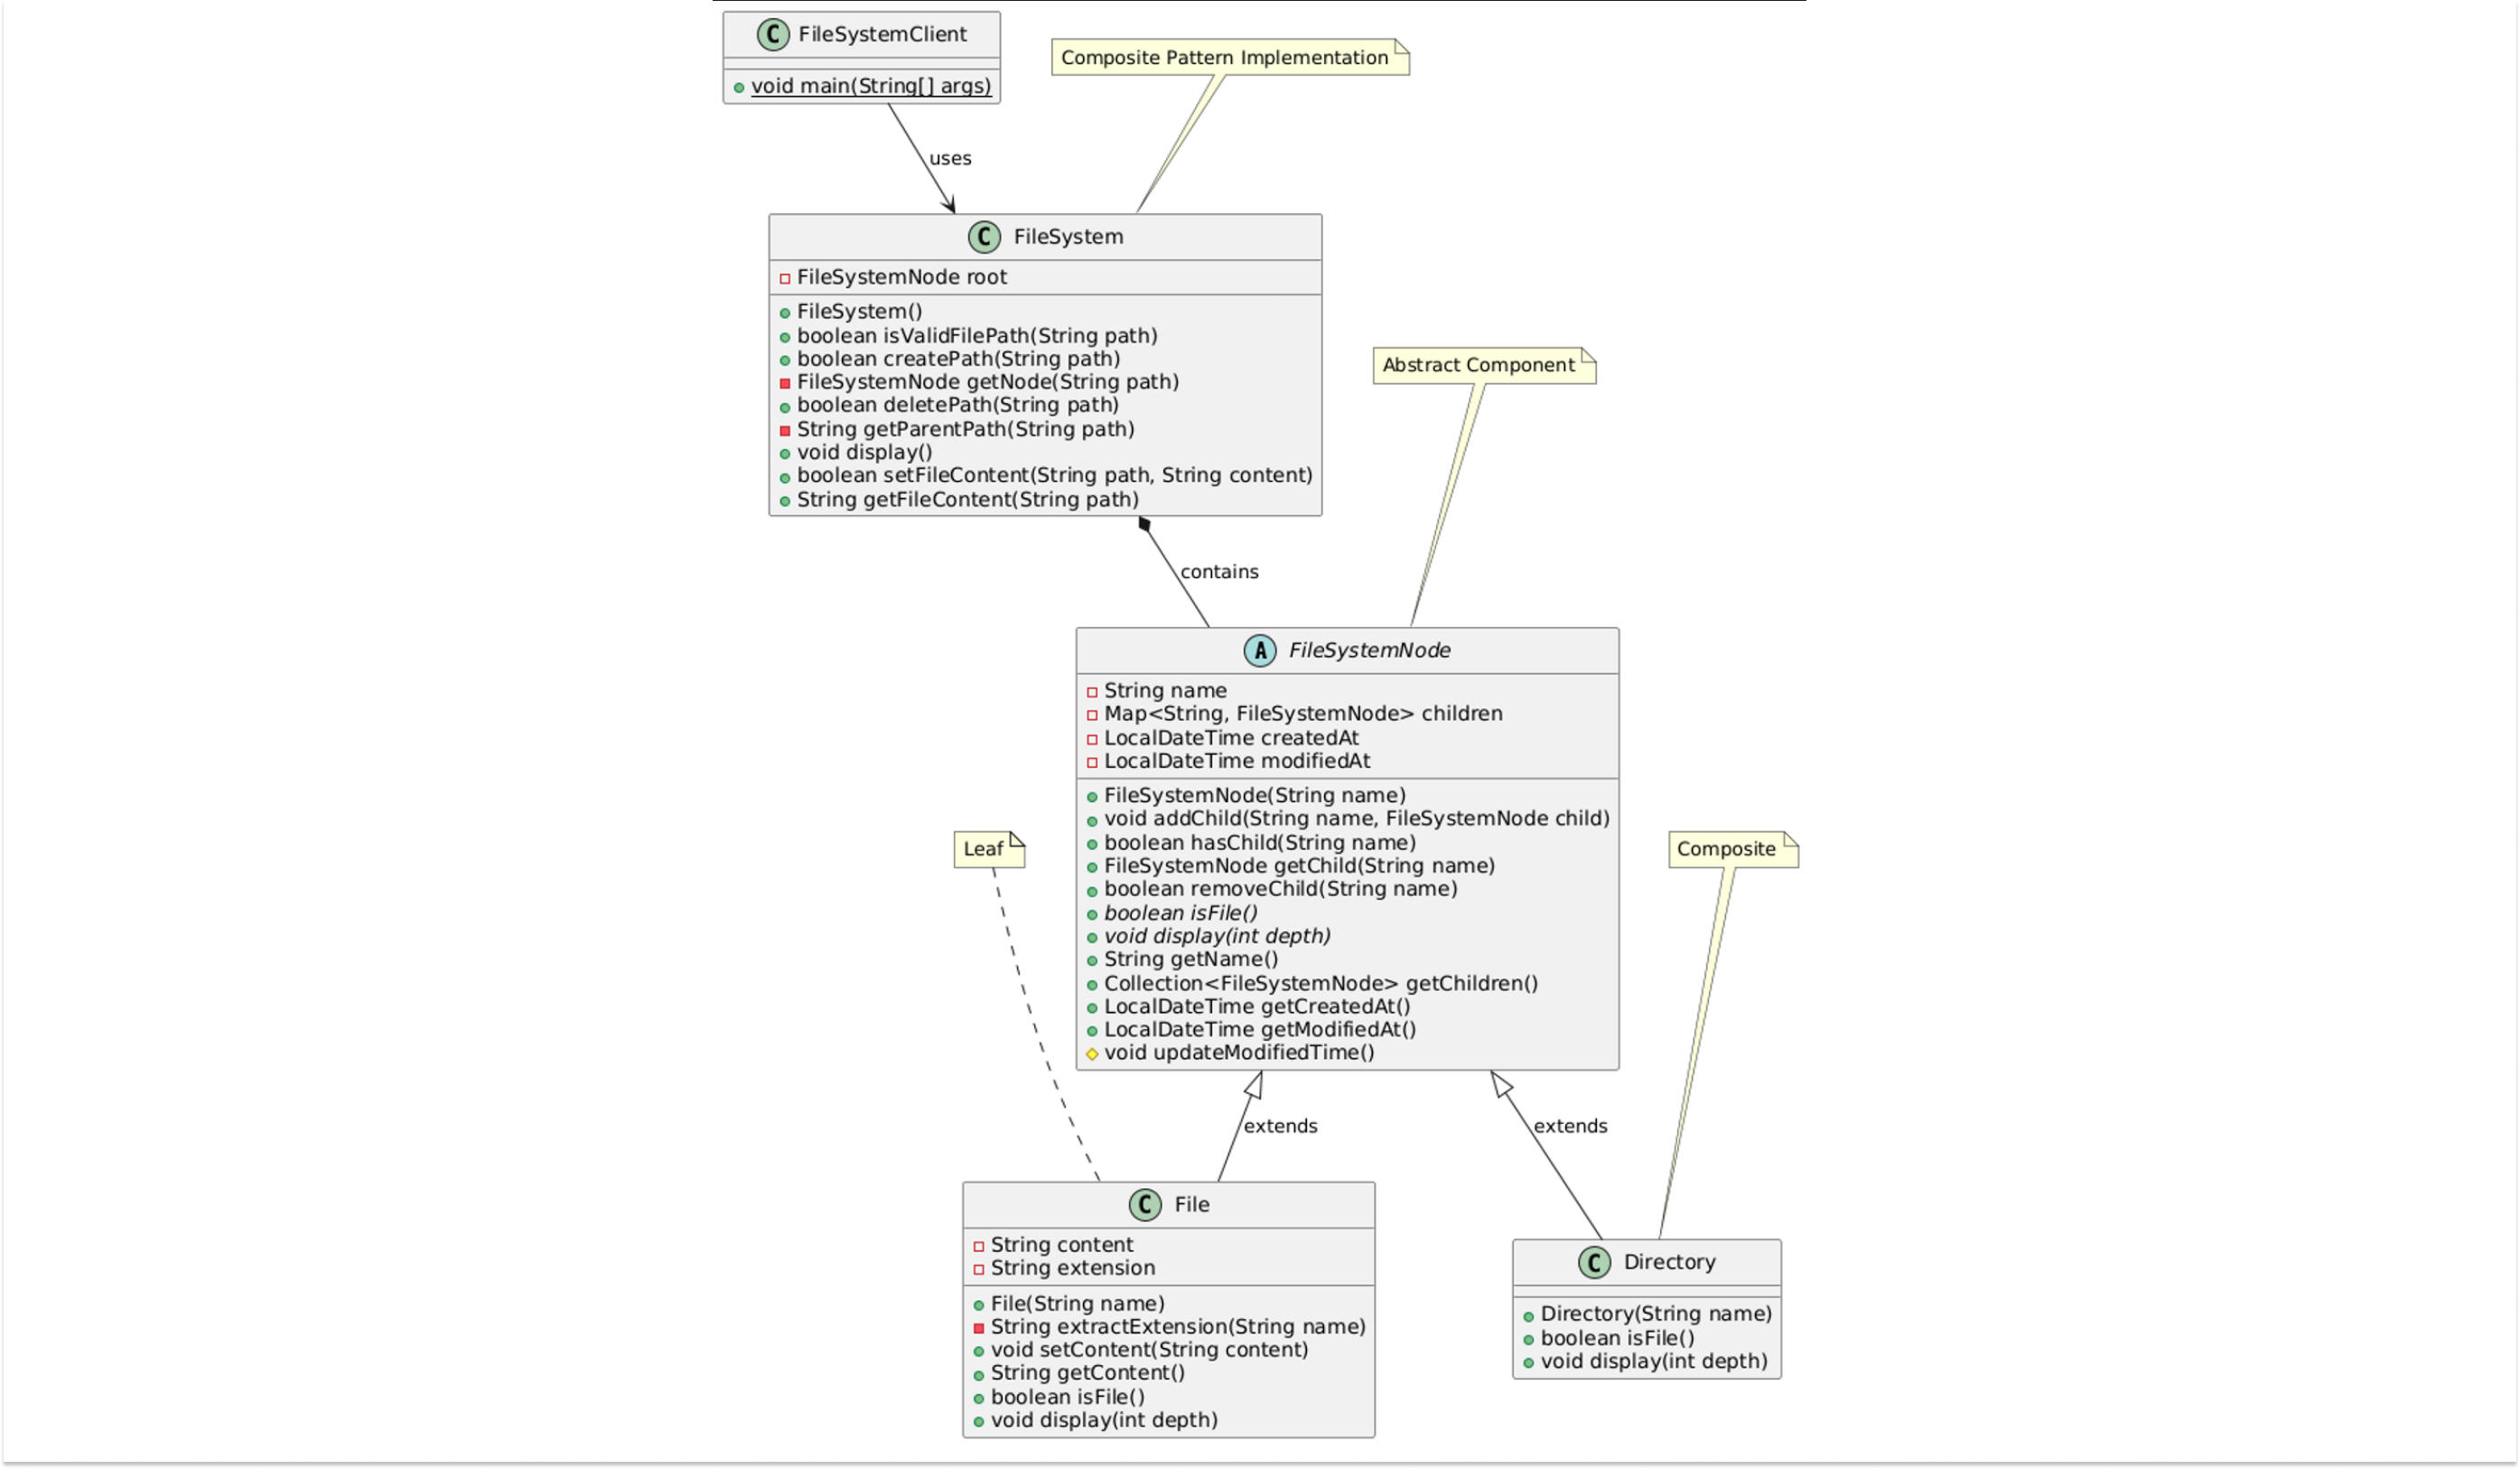

#### Composite Pattern

In [1]:
from abc import ABC, abstractmethod

class FileNode(ABC):
    def __init__(self, name):
        self.name = name
        self.children = {}
    
    def getName(self):
        return self.name

    def setName(self, name):
        self.name = name

    def getChildren(self):
        return self.children

    def addChild(self, name, fileNode):
        self.children[name] = fileNode
     
    def hasChild(self, name):
        return name in self.children

    def getChild(self, name):
        return self.children[name]

    def removeChild(self, name):
        if name in self.children:
            del self.children[name]

    @abstractmethod
    def isFile(self):
        pass

    @abstractmethod
    def display(self, depth: int):
        pass

class Directory(FileNode):
    def __init__(self, name):
        super().__init__(name)

    def isFile(self):
        return False

    def display(self, depth: int):
        intent = " "* (depth*2)
        print(f"{intent}📁 {self.getName()}")
        for childNode in self.getChildren().values():
            childNode.display(depth + 1)

class File(FileNode):
    def __init__(self, name):
        super().__init__(name)
        self.content = None
        self.extension = self.extractExtention(name)

    def extractExtention(self, name):
        if '.' in name:
            return name.rsplit(".", 1)[-1]
        return ""
    
    def setContent(self, content):
        self.content = content

    def getContent(self):
        return self.content

    def isFile(self):
        return True

    def display(self, depth: int):
        intent = " " * (depth*2)
        print(f"{intent}📄 {self.getName()}")
            
class FileSystem:
    def __init__(self):
        self.root = Directory("/")

    def isValidPath(self, path: str):
        return isinstance(path, str) and path != '' and path.startswith('/')

    def hasExtension(self, component):
        return '.' in component
    
    def mkdir(self, path: str):
        if not self.isValidPath(path):
            print("Invalid path! Please specify a valid path.")
            return

        pathComponents = path.split("/")
        current = self.root
        
        for component in pathComponents:
            if component == '':
                continue
            if current.hasChild(component) == False:
                if self.hasExtension(component):
                    newNode = File(component)
                else:
                    newNode = Directory(component)
                current.addChild(component, newNode)
            current = current.getChild(component)

    def displayFileSystem(self):
        current = self.root
        current.display(0)
        print()

    def getNode(self, path):
        if not self.isValidPath(path):
            print("Invalid path! Please specify a valid path.")
            return None

        pathComponents = path.split("/")
        current = self.root

        for component in pathComponents:
            if component == '':
                continue
            if current.hasChild(component) == False:
                print("Invalid Path!")
                return None
            current = current.getChild(component)
        return current
    
    def ls(self, path):

        currentNode = self.getNode(path)
        currentNode.display(0)
        print()


    def addContentToFile(self, filePath, content):
        currentNode = self.getNode(filePath)
        if currentNode == None or not currentNode.isFile():
            print("Error! Its not a file or file not present.")
            return
        currentNode.setContent(content)
        print(f"Content Added to File: {currentNode.getName()}")

    def displayFileContent(self, filePath):
        currentNode = self.getNode(filePath)
        if currentNode == None or not currentNode.isFile():
            print("Error! Its not a file or file not present.")
            return
        print(f"FileName: {currentNode.getName()}")
        print(f"Content: {currentNode.getContent()}")
        
if __name__ == '__main__':
    fileSystem = FileSystem()
    fileSystem.mkdir('/document/cwa_lld/solid_principles.java')
    # fileSystem.displayFileSystem()
    # print()
    fileSystem.mkdir("/document/cwa_lld/design_file_system.java")
    # fileSystem.displayFileSystem()
    # print()
    fileSystem.mkdir("/document/cwa_hld/")
    fileSystem.mkdir("/document/cwa_lld/InterviewQuestions")
    # fileSystem.displayFileSystem()
    # print()
    fileSystem.mkdir("/document/cwa_hld/horizontal_scaling.txt")
    fileSystem.displayFileSystem()
    print()
    fileSystem.ls("/document/cwa_lld/")
    fileSystem.ls("/")
    fileSystem.addContentToFile("/document/cwa_lld/design_file_system.java", r'print("Hello Java Program")')
    fileSystem.displayFileContent("/document/cwa_lld/design_file_system.java")

📁 /
  📁 document
    📁 cwa_lld
      📄 solid_principles.java
      📄 design_file_system.java
      📁 InterviewQuestions
    📁 cwa_hld
      📄 horizontal_scaling.txt


📁 cwa_lld
  📄 solid_principles.java
  📄 design_file_system.java
  📁 InterviewQuestions

📁 /
  📁 document
    📁 cwa_lld
      📄 solid_principles.java
      📄 design_file_system.java
      📁 InterviewQuestions
    📁 cwa_hld
      📄 horizontal_scaling.txt

Content Added to File: design_file_system.java
FileName: design_file_system.java
Content: print("Hello Java Program")


- Interviewer: What makes your approach effective?
- Candidate: My key strengths of my approach for the File System:
    1. Composite Pattern
        - Implemented the composite pattern to represent the file system hierarchy, where both files and directories share a common interface. This allows uniform treatment of individual files and directories whil supporting recursive operations.
    2. Single Responsibility Principle:
        - Each class has a distinct responsibility. The file class represents individual files, directory manages collections of files and subdirectiories, and the overall file system operations are handled cohesively without violating SRP.
    3. Extensibility:
        - The design allows easy addition of new file types or directory behaviors without modifying exisiting code. The common interface ensures that new components integrate seamlessly into the existing structure.
    4. Maintainability
        - The separation of conerns makes the system easy to manage and extend. Operations like adding, removing, or searching files and directories are encapsulated within revelant classes, reducing code complexity
    5. Real world modeling
        - The implementation closely resembles an actual file system, where directories can contain files or other directories are encapsulated withing relevant classes, reducing code complexity.